# Carregar as bibliotecas

In [20]:
import numpy as np
from skimage import io, data, filters, util, color, transform
from scipy import ndimage, stats, fft
import matplotlib.pyplot as plt
from skimage.util import img_as_float, img_as_uint, img_as_ubyte
import math

In [2]:
def log_imshow(img):
    return np.log( np.abs(img)+1 )

In [3]:
def mapping(img):
    nimg = img_as_float(img)
    mmin = np.min(nimg)
    nimg = nimg - mmin
    mmax = np.max(nimg)
    return nimg/mmax

# Questão 1
<p align="justify">Mudar a cor do fundo (*background*) da imagem apresentada a continuação, ela deve estar em tons de azul claro. Além disso, é fornecido a imagem binária, onde os fósforos estão representados pela cor branca e o fundo pela cor preta. Use operações aritméticas para executar o processo de modificação do fundo. A continuação são mostradas a imagem em escala de cinza e a respectiva máscara.</p>


<table><tr>
<td>
<figure><img src="https://drive.google.com/uc?id=1V3OaLUh34dRCx-53PGsUYOMb1kZ1gqzo" alt="Drawing" width="300" class="center"/>
<figcaption>Imagem em escala de cinza</figcaption>
</figure>
</td>
<td>
<figure>
<img src="https://drive.google.com/uc?id=13NOF3oDNkmNtHCHmbX_9d0-AISPEmGZe" alt="Drawing" width="300" class="center"/>
<figcaption>Máscara</figcaption>
</figure>
</td>
</tr>
</table>


<p align="justify">DICA: para conseguir modificar a intensidade do fundo, incremente um valor $inc$ nos canais vermelho e verde, e incremente um valor $2*inc$ no canal azul. Preserve as intensidades originais dos fósforos. </p>


<p align="justify">A Figura a continuação mostra o resultado final. A imagem gerada deve ser colorida e o tecido (fundo da imagem) deve aparecer na cor azul claro. </p>

<center>
<figure>
<img src="https://drive.google.com/uc?id=1vGfZccYEdWi1wLmKXow6rqgyF2phkXSA" alt="Drawing" width="300" class="center"/>
<figcaption>Imágem resultante</figcaption>
</figure>
</center>



In [4]:
def change_background(img, mask):
  ink=50
  nimg = color.gray2rgb(img)
  nimg[mask==0, 0] += ink
  nimg[mask==0, 1] += ink
  nimg[mask==0, 2] += ink*2

  return nimg

(600, 600, 3)


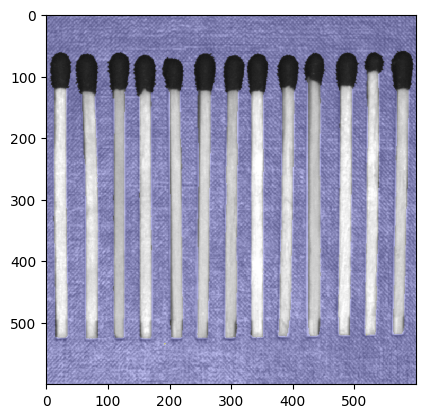

In [5]:
img = io.imread('https://drive.google.com/uc?id=1V3OaLUh34dRCx-53PGsUYOMb1kZ1gqzo')
mask = io.imread('https://drive.google.com/uc?id=13NOF3oDNkmNtHCHmbX_9d0-AISPEmGZe')
nimg = change_background(img, mask)
print(nimg.shape)
plt.imshow(nimg)

# Questão 2

<p align="justify">
O função <i>util.random_noise()</i> é utilizada para inserir ruído dentro de uma imagem. Entre os tipos de ruídos implementados está o ruido ``sal e pimenta'' (<i>mode = 's&p'</i>). Este tipo de ruído adiciona pontos brancos e pretos dentro da imagem. Adicione ruído sal e pimenta em uma imagem e remova o ruído inserido utilizando os métodos da mediana e minmax. Logo, compare as imagens resultantes com a imagem original utilizando o erro médio quadrático normalizado.
$$NMSE =\frac{\sum_{x=0}^{M-1}\sum_{y=0}^{N-1} (f(x,y) - g(x,y))^2 }{\sum_{x=0}^{M-1}\sum_{y=0}^{N-1}f(x,y)}$$
</p>

<p align="justify">

</p>

In [6]:
def filtros_median_minmax(noise_img):
  img_median = filters.median(noise_img)
  img_min_max = filters.rank.maximum(noise_img, np.ones( (2,2) ), out=None)
  img_min_max = filters.rank.minimum(noise_img, np.ones( (2,2) ), out=None)
  return img_median, img_min_max

In [7]:
def NMSE(f, g):
  f = img_as_float(f)
  g = img_as_float(g)
  n = np.sum((f - g) ** 2)
  o = np.sum(f)
  d = n / o
  return d

In [8]:
lenna = io.imread('https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_', as_gray=True)
clown = io.imread('https://drive.google.com/uc?id=1JIiGsypcTefhq1s1Hk9fQIks8GE5KbuK', as_gray=True)

Erro médio quadrátivo normalizado 0.0008542972885276617
Erro médio quadrátivo normalizado 0.05546819456332106
Erro médio quadrátivo normalizado 0.19009302219116211


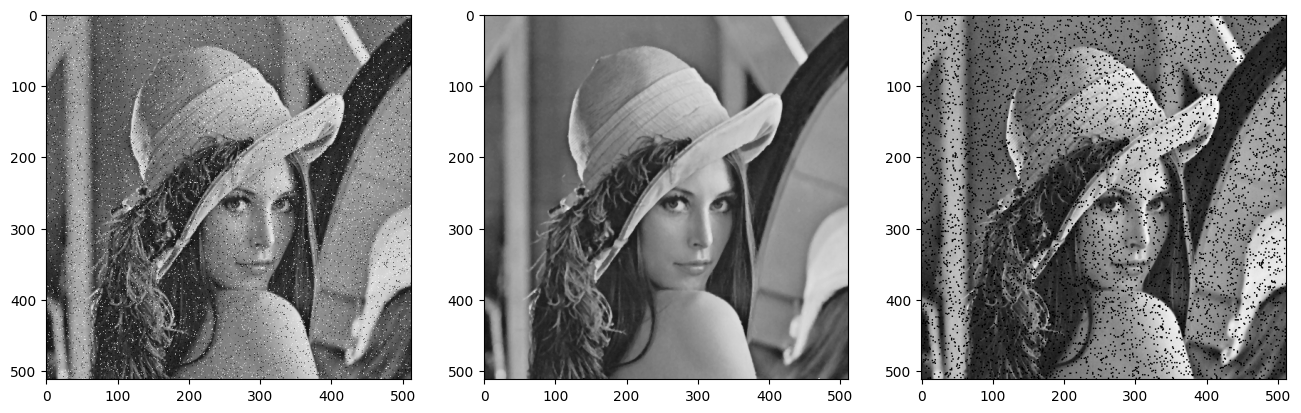

In [9]:

noise_img = img_as_ubyte( util.random_noise(lenna, mode='s&p') )
img_median, img_min_max = filtros_median_minmax(noise_img)
f, ax = plt.subplots(1, 3, figsize=(16,16))
ax[0].imshow(noise_img, cmap='gray')
ax[1].imshow(img_median, cmap='gray')
ax[2].imshow(img_min_max, cmap='gray')
print(f'Erro médio quadrátivo normalizado {NMSE(lenna, img_median)}')
print(f'Erro médio quadrátivo normalizado {NMSE(lenna, img_min_max)}')
print(f'Erro médio quadrátivo normalizado {NMSE(lenna, clown)}')

# Questão 3
<p align="justify">
Implementar o método de realce de imagens, onde $$f_{highpass}(x,y) = (1+G).f(x,y)-G.f_{mean}(x,y)$$
onde $0 \leq G \leq 2$
</p>

In [14]:
def enhance(img, G=2, sigma=1):
  fmean = filters.gaussian(img, sigma)
  fhighpass = (1 + G) * img - G * fmean
  return fhighpass

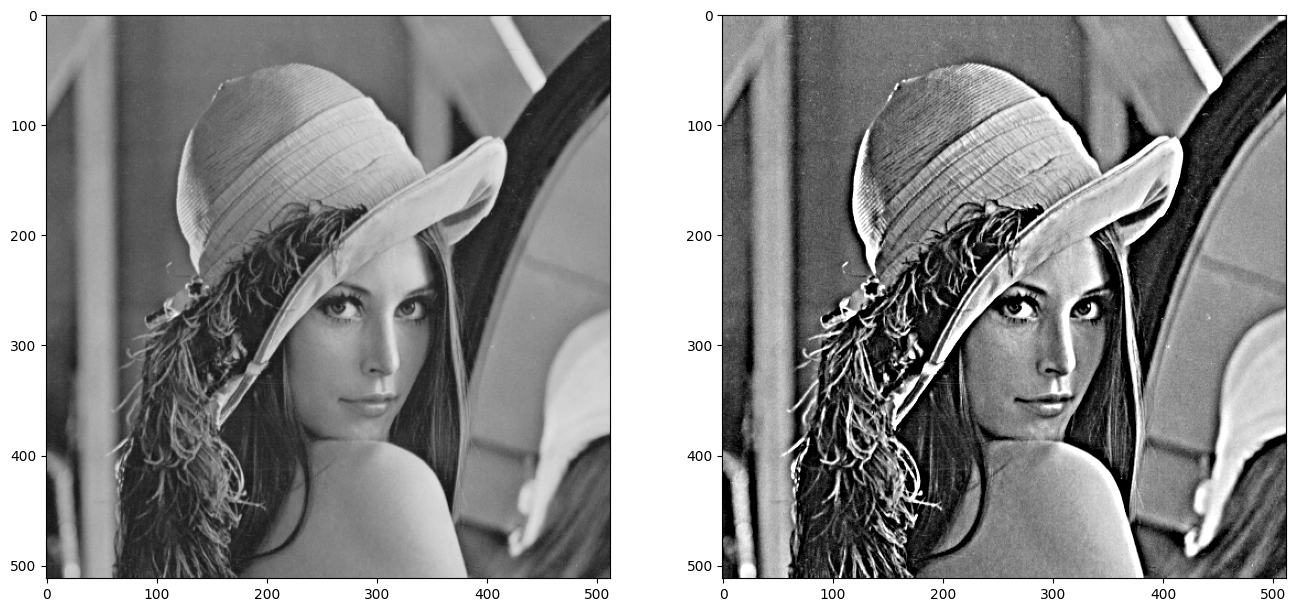

In [15]:
nimg = enhance(lenna, G=2, sigma=5)
f,ax = plt.subplots(1,2,figsize=(16,16))
ax[0].imshow(lenna, cmap='gray', vmin=0, vmax=1)
ax[1].imshow(nimg, cmap='gray', vmin=0, vmax=1)

# Questão 3

<p align="justify">
Dada a seguinte imagem, eliminar o ruído produzido pelo ruído periódico. Teste com os seguinte filtros: média, mediana e a filtragem no domínio da frequência. Para o caso da filtragem no domínio da frequência, primeiro calcule o espectro de Fourier (Figura b) e elimine a \textbf{região} ao redor dos ``spikes'' (assinalados com a seta vermelha). Os ``spikes'' estão localizados nas coordenadas (88,88) e (170,170). A terceira imagem mostra o processo depois de apagar esses valores.
Para apagar os valores, basta atribuir zero para todos os elementos da região.
</p>

<p align="justify">

</p>

<table><tr>
<td> <img src="https://drive.google.com/uc?id=1ExhUVoHaj2i4gN1UWC6U7RfP-boZhnRL" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1BGJbV6sXNNlt2PmIZ7RCyHpQfPRpZgJ6" alt="Drawing"  width="300"/> </td>
<td> <img src="https://drive.google.com/uc?id=1d3bAvzHJ5wRwPxIXGZXiUhP7bA5o0SbY" alt="Drawing"  width="300"/> </td>
</tr></table>

In [28]:
def filtragem(img, window_size=5, coord1=(88,88), coord2=(170,170)):
  # adicionar codigo
  # nimg :  imagem filtrada
  # fimg_shifted: coeficientes (espectro) de Fourier
  fimg_shifted = fft.fftshift(fft.fft2(img))
  coordAux = 10
  fimg_shifted[coord1[0]-coordAux : coord1[0]+coordAux, coord1[1]-coordAux : coord1[1]+coordAux] = 0
  fimg_shifted[coord2[0]-coordAux : coord2[0]+coordAux, coord2[1]-coordAux : coord2[1]+coordAux] = 0
  fimg_shifted[(0,0)] = 0

  nimg = np.real(fft.ifft2(fft.ifftshift(fimg_shifted)))

 # fimg_shifted

  return nimg, fimg_shifted

In [18]:
lennaR = io.imread('https://drive.google.com/uc?id=1ExhUVoHaj2i4gN1UWC6U7RfP-boZhnRL', as_gray=True)

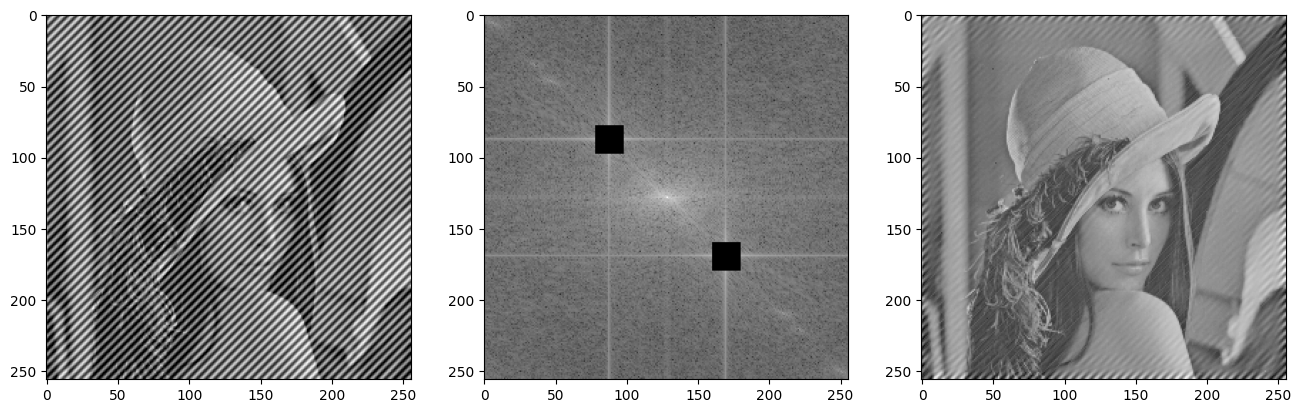

In [29]:

nimg, fimg = filtragem(lennaR, window_size=10)

f, ax = plt.subplots(1, 3, figsize=(16,16))
ax[0].imshow(lennaR, cmap='gray')
ax[1].imshow(np.log(np.abs(fimg)+1), cmap='gray')
ax[2].imshow(nimg, cmap='gray')

# Questão 4
<p align="justify">Modifique o código <i>NoiseSum</i> (disponível nos slides) que remove o ruído de $n$ imagens ruidosas através da média de todas as imagens. Modifique o código de forma tal que use a mediana no lugar da média. Para encontrar a mediana de um conjunto de elementos basta ordenar os dados e selecionar o elemento que se encontra na metade do conjunto de dados. Por exemplo, seja A = [4, 6, 2, 9, 1, 3, 9], depois de ordenar o vetor fica da seguinte forma [1, 2, 3, 4, 6, 9, 9]. A mediana é igual a 4. Para ordenar um conjunto de elementos use a função <i>numpy.sort(dados, axis=- 1)</i>, onde <i>dados</i> são os elementos que vão ser ordenados e *axis* especifica em qual das dimensões da matriz vai ser realizada a ordenação dos dados, 0 ordenada por linhas, 1 por colunas e 2 por profundidade. Não é necessário salvar as imagens ruidosas que foram geradas na execução do código. </p>

<p align="justify">
Logo, modifique o código usando a função <i>numpy.median(dados, axis)</i> para encontrar a imagem "mediana".</p>

In [16]:
def NoiseSum(img, n):
    l, c = img.shape
    figs = np.zeros((l,c,n))
    for i in range(n):
      figs[:,:,i] = util.random_noise(lenna, mode='s&p')
    print(math.ceil(n/2))
    nimg = np.sort(figs, axis= 2)[:,:,math.ceil(n/2)]
    nimg2 = filters.median(img)
    return figs, nimg, nimg2

5


Text(0.5, 1.0, 'Imagem Filtrada2')

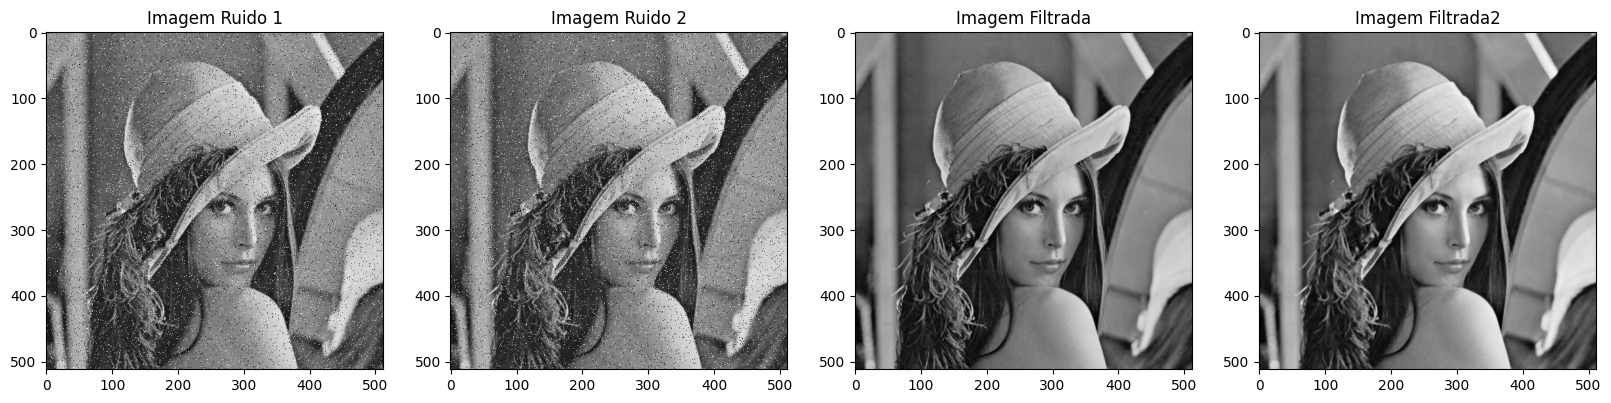

In [21]:
lenna = io.imread('https://drive.google.com/uc?id=1k0FG4pT6WMjFeG-V63OBXNS7_CvfY5m_', as_gray=True)
figs, nimg, nimg2 = NoiseSum(lenna, 10)

f, ax = plt.subplots(1,4, figsize=(20,20))
ax[0].imshow(figs[:,:,0], cmap='gray')
ax[0].set_title('Imagem Ruido 1')
ax[1].imshow(figs[:,:,1], cmap='gray')
ax[1].set_title('Imagem Ruido 2')
ax[2].imshow(nimg, cmap = 'gray')
ax[2].set_title('Imagem Filtrada')
ax[3].imshow(nimg2, cmap = 'gray')
ax[3].set_title('Imagem Filtrada2')